# House Prices - Advanced Regression Techniques
the data can be found at th following link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [36]:
import pandas as pd # exploring and manipulating data.
import numpy as np # arrays, algebra
import matplotlib.pyplot as plt #2-d plotting
import sympy
import seaborn as sns # statistical data visualisation
from scipy.stats import norm, skew #for some statistics

### Import Data

In [2]:

File_name_train = 'data/train.csv'
File_name_test = 'data/test.csv'

# import training and test data
data_train = pd.read_csv(File_name_train)
data_test = pd.read_csv(File_name_test)

## Become familiar with data

### Size of data

In [3]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
m,n = data_train.shape
m_test, n_test = data_test.shape

print('\n\nData = Training Data')
print('Number of training examples: %d'%(m))
print('Number of features (including output): %d'%(n))

print('\nData = Test Data')
print('Number of training examples: %d'%(m_test))
print('Number of features (excluding output): %d'%(n_test))




Data = Training Data
Number of training examples: 1460
Number of features (including output): 81

Data = Test Data
Number of training examples: 1459
Number of features (excluding output): 80


# Features

In [4]:
#all features
print('\n\n The following are the features for the ')

print('\tTRAIN (n  = %.0f) \t\t\t TEST (n = %.0f)'%(n, n_test))
cnt = 0

for feature in data_train.columns:
    cnt += 1
    if cnt <= n_test:
        print('%d \t.'%(cnt), feature,'\t\t\t\t',data_test.columns[cnt-1])
    else:
        print('%d \t.'%(cnt), feature)



 The following are the features for the 
	TRAIN (n  = 81) 			 TEST (n = 80)
1 	. Id 				 Id
2 	. MSSubClass 				 MSSubClass
3 	. MSZoning 				 MSZoning
4 	. LotFrontage 				 LotFrontage
5 	. LotArea 				 LotArea
6 	. Street 				 Street
7 	. Alley 				 Alley
8 	. LotShape 				 LotShape
9 	. LandContour 				 LandContour
10 	. Utilities 				 Utilities
11 	. LotConfig 				 LotConfig
12 	. LandSlope 				 LandSlope
13 	. Neighborhood 				 Neighborhood
14 	. Condition1 				 Condition1
15 	. Condition2 				 Condition2
16 	. BldgType 				 BldgType
17 	. HouseStyle 				 HouseStyle
18 	. OverallQual 				 OverallQual
19 	. OverallCond 				 OverallCond
20 	. YearBuilt 				 YearBuilt
21 	. YearRemodAdd 				 YearRemodAdd
22 	. RoofStyle 				 RoofStyle
23 	. RoofMatl 				 RoofMatl
24 	. Exterior1st 				 Exterior1st
25 	. Exterior2nd 				 Exterior2nd
26 	. MasVnrType 				 MasVnrType
27 	. MasVnrArea 				 MasVnrArea
28 	. ExterQual 				 ExterQual
29 	. ExterCond 				 ExterCond
30 	. Foundation 				 Fo

#### Data Types

In [5]:
#How many columns with different datatypes are there?
print('\ndata types of features:')

cnt = 0
d_type = ['float64', 'int64','object','dtype']

print('\tTRAIN \t\t TEST')
for c1, c2 in zip(data_train.get_dtype_counts(), data_test.get_dtype_counts()):
    cnt += 1
    print("%s:\t%-9s \t%s"%(d_type[cnt],c1, c2))
    



data types of features:
	TRAIN 		 TEST
int64:	3         	11
object:	35        	26
dtype:	43        	43


#### Information on all features

In [6]:
print('\n\nTRAINING data Information: ')
data_train.info()

print('\n\nTEST data Information: ')
data_test.info()





TRAINING data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null obje

#### Object Vrs non-Object

In [7]:
print('\n\nThe following are the non-object features for Training and test data')  

train_feature_nobj = data_train.columns[data_train.dtypes != object]
test_feature_nobj = data_test.columns[data_test.dtypes != object]

n_nobj_mx = max(len(train_feature_nobj),len(test_feature_nobj))
n_nobj_mn = min(len(train_feature_nobj),len(test_feature_nobj))

print('TRAIN (%.0f) \t\t\tTEST (%.0f) '%(len(train_feature_nobj),len(test_feature_nobj)))

for i in range(0, n_nobj_mx):
    if (i) < (n_nobj_mn):
        print('%.0f. %s \t\t\t\t %s'%(i + 1, train_feature_nobj[i],test_feature_nobj[i]))
    else:
        print('%.0f. %s'%(i + 1,train_feature_nobj[i]))
    
    
print('\n\nThe following are the object features for Training and test data')  

train_feature_obj = data_train.columns[data_train.dtypes == object]
test_feature_obj = data_test.columns[data_test.dtypes == object]

n_obj_mx = max(len(train_feature_obj),len(test_feature_obj))
n_obj_mn = min(len(train_feature_obj),len(test_feature_obj))

print('TRAIN (%.0f) \t\t\tTEST (%.0f) '%(len(train_feature_obj),len(test_feature_obj)))

for i in range(0, n_obj_mx):
    if (i) < n_obj_mn:
        print('%.0f. %s \t\t\t\t %s'%(i + 1, train_feature_obj[i],test_feature_obj[i]))
    else:
        print('%.0f.  \t\t\t %s'%(i + 1, train_feature_obj[i]))
    
 



The following are the non-object features for Training and test data
TRAIN (38) 			TEST (37) 
1. Id 				 Id
2. MSSubClass 				 MSSubClass
3. LotFrontage 				 LotFrontage
4. LotArea 				 LotArea
5. OverallQual 				 OverallQual
6. OverallCond 				 OverallCond
7. YearBuilt 				 YearBuilt
8. YearRemodAdd 				 YearRemodAdd
9. MasVnrArea 				 MasVnrArea
10. BsmtFinSF1 				 BsmtFinSF1
11. BsmtFinSF2 				 BsmtFinSF2
12. BsmtUnfSF 				 BsmtUnfSF
13. TotalBsmtSF 				 TotalBsmtSF
14. 1stFlrSF 				 1stFlrSF
15. 2ndFlrSF 				 2ndFlrSF
16. LowQualFinSF 				 LowQualFinSF
17. GrLivArea 				 GrLivArea
18. BsmtFullBath 				 BsmtFullBath
19. BsmtHalfBath 				 BsmtHalfBath
20. FullBath 				 FullBath
21. HalfBath 				 HalfBath
22. BedroomAbvGr 				 BedroomAbvGr
23. KitchenAbvGr 				 KitchenAbvGr
24. TotRmsAbvGrd 				 TotRmsAbvGrd
25. Fireplaces 				 Fireplaces
26. GarageYrBlt 				 GarageYrBlt
27. GarageCars 				 GarageCars
28. GarageArea 				 GarageArea
29. WoodDeckSF 				 WoodDeckSF
30. OpenPorchSF 				

### filing in the blank values

In [8]:

#missing data
total = data_train.isnull().sum().sort_values(ascending = False)
percent = (data_train.isnull().sum() / data_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])


print('The following is the misstion data:')
print(missing_data.head(20))

#dealing with missing data
data_train = data_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index)
missing_data_now = data_train.isnull().sum().max() #just checking that there's no missing data missing...

print('\n\nmissing data after deletion = %.0f'%(missing_data_now))

The following is the misstion data:
              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000


missing data after deletion = 0


## DATA CORRELATIONS:

Numer of features with correlations: 35


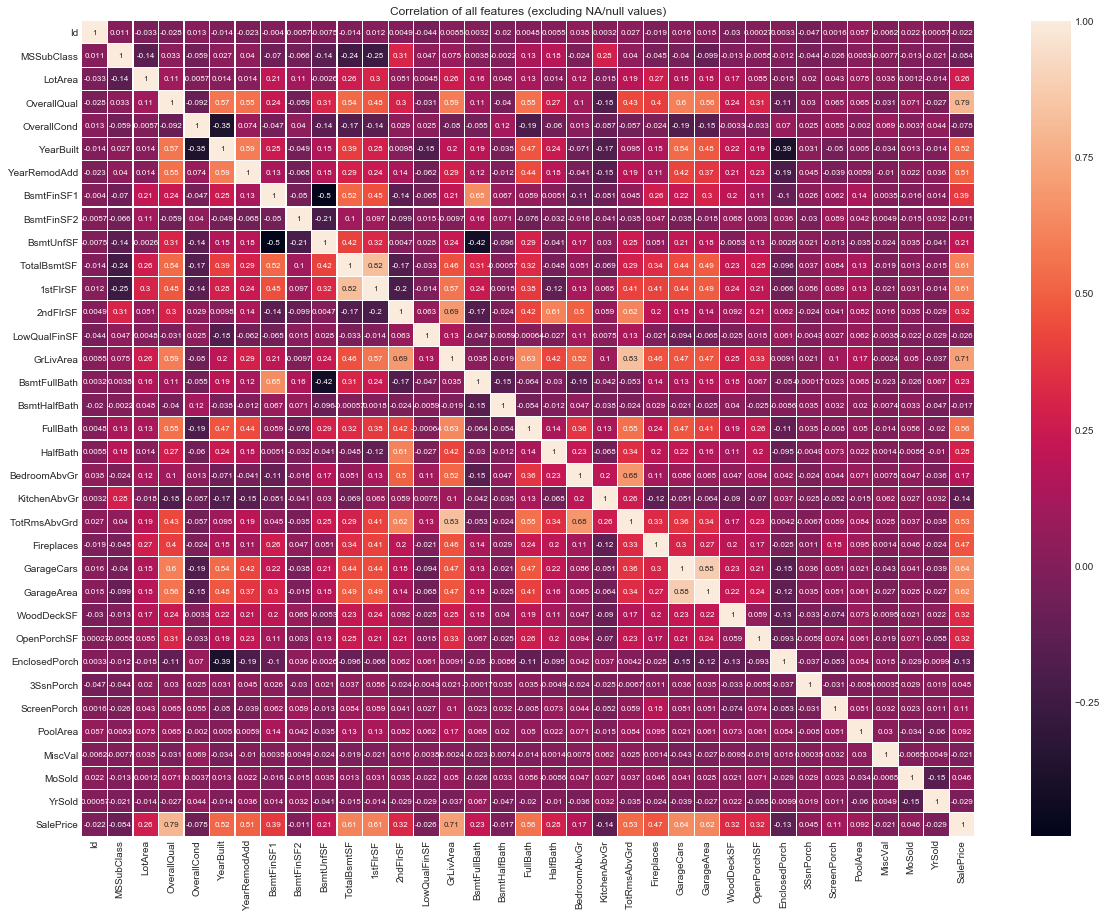

In [26]:
#%%#ALL CORRELATIONS - 
#correlation matrix - show the correlation between all featurescorrelations = data_train.corr() # determines parameters that are correlated to Price

f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(correlations ,  linewidths = 0.1, vmax = 1, annot = True, annot_kws={"size": 8});
ax.set_title('Correlation of all features (excluding NA/null values)')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90) 
print('Numer of features with correlations: %d'%(correlations.shape[1]))



Text(0.5,1,'Correlation of all features <-0.5 and >0.5')

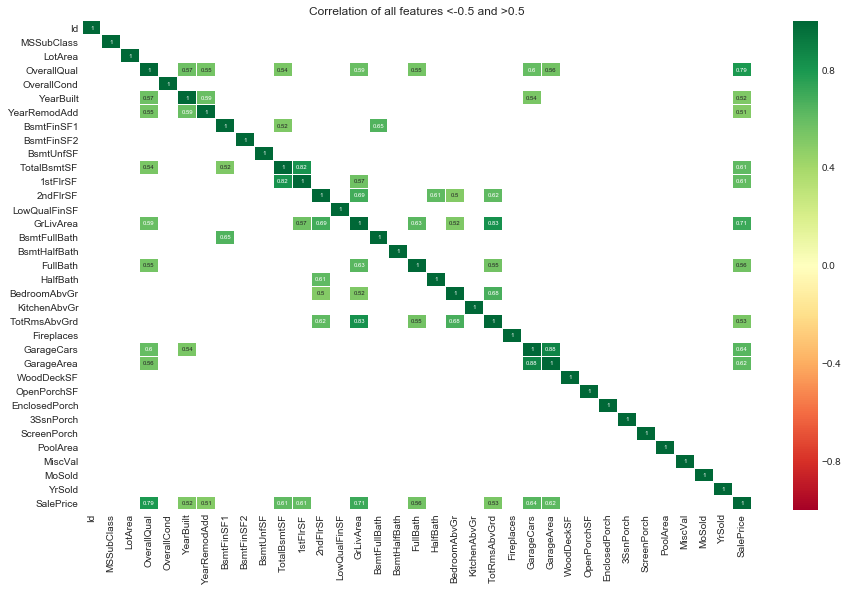

In [24]:
#show all features but only values with correlatinos  than 0.5 and less than -0.5
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(correlations[(correlations >= 0.5) | (correlations <= -0.5)], 
         vmax = 1.0, vmin = -1.0, linewidths = 0.2, annot = True, cmap="RdYlGn", annot_kws={"size": 6});
plt.yticks(rotation = 0)
plt.xticks(rotation = 90) 
ax.set_title('Correlation of all features <-0.5 and >0.5')

#### Correlations with cost Price


List of features with a correlation to the Price in descending order
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64


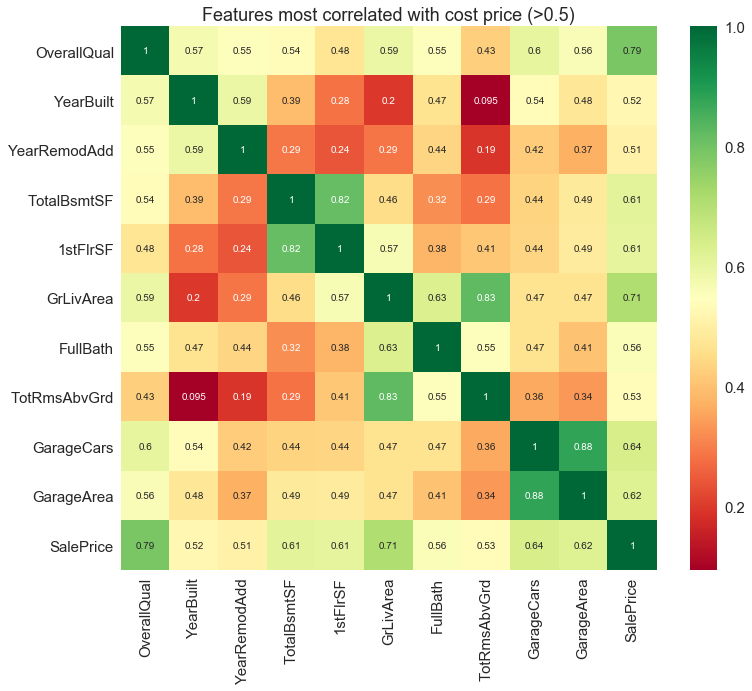

In [48]:
# most correlated featues = features with correlation to Price >0.5
top_correlations = correlations.index[abs(correlations["SalePrice"]) > 0.5]
plt.figure(figsize=(12,10))
sns.set(font_scale = 1.5)
g = sns.heatmap(data_train[top_correlations].corr(), annot = True, cmap = "RdYlGn", annot_kws={"size": 10})
plt.title('Features most correlated with cost price (>0.5)')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

corr_price = data_train.corr()["SalePrice"]
corr_price = corr_price[1:-1] # remove the lat one... Price
corr_price = corr_price[np.argsort(corr_price, axis = 0)[::-1]] #sort in descending order
print('\nList of features with a correlation to the Price in descending order')
print(corr_price)
      

Statistics of Price distribution:
	mu = 180930.39 
	sigma = 79441.73



Text(0.5,1,'SalePrice distribution')

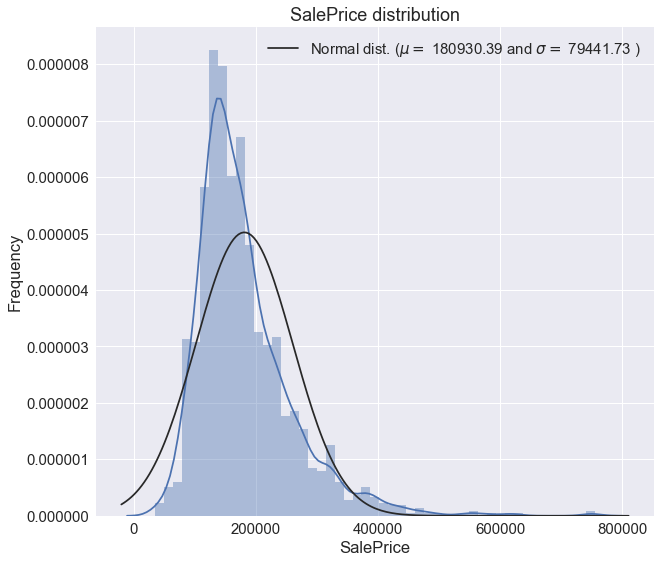

In [39]:
f, ax = plt.subplots(figsize=(1, 9))
sns.distplot(data_train['SalePrice'] , fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['SalePrice']) # mean and stdv

print('Statistics of Price distribution:')
print( '\tmu = {:.2f} \n\tsigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = $ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


The largest correlation is with Cost Price:
Feature: OverallQual
Correlation coefficient with cost price: 0.791069


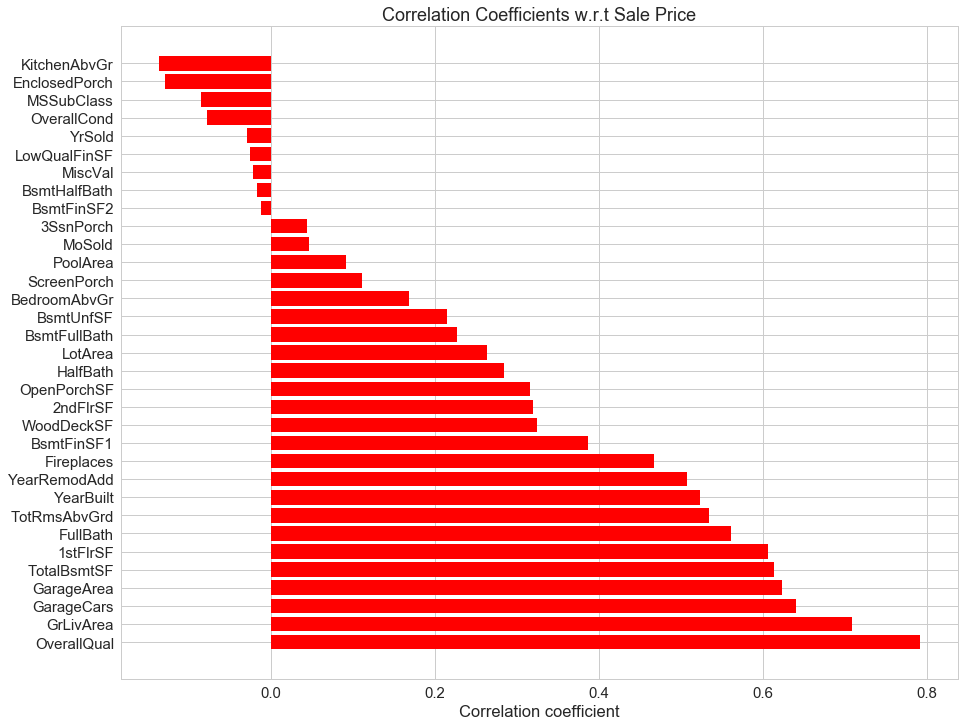

In [ ]:
Show top 10 data